<a href="https://colab.research.google.com/github/samriddhisingh05/1BM23CS295_Samriddhi_Singh_ML_Lab/blob/main/1BM23CS295_Lab_4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("HR_comma_sep.csv")

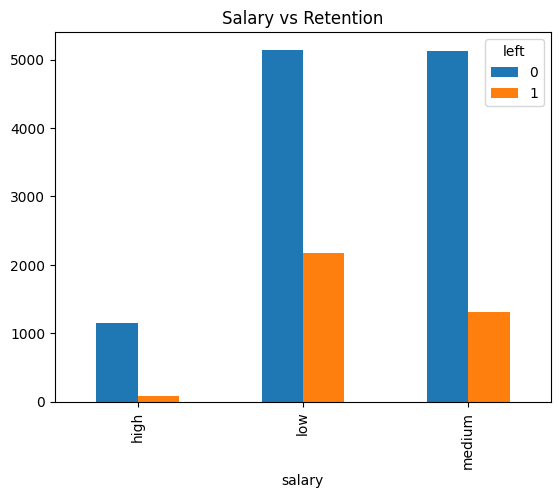

In [6]:
pd.crosstab(df.salary, df.left).plot(kind='bar')
plt.title("Salary vs Retention")
plt.show()

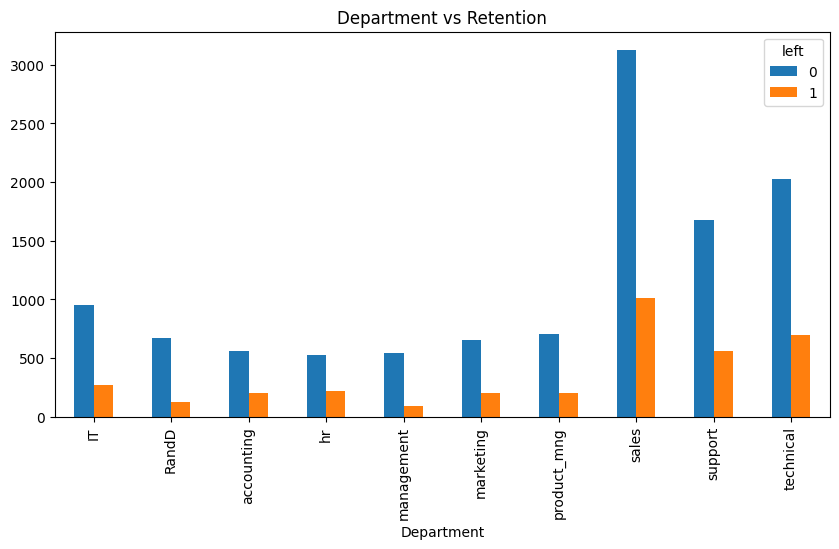

In [7]:
pd.crosstab(df.Department, df.left).plot(kind='bar', figsize=(10,5))
plt.title("Department vs Retention")
plt.show()

In [8]:
df_model = df[['satisfaction_level',
               'average_montly_hours',
               'time_spend_company',
               'promotion_last_5years',
               'salary',
               'left']]

In [9]:
df_model = pd.get_dummies(df_model, columns=['salary'], drop_first=True)

In [10]:
X = df_model.drop('left', axis=1)
y = df_model['left']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.76


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [15]:
zoo = pd.read_csv("zoo-data.csv")
class_type = pd.read_csv("zoo-class-type.csv")

zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [16]:
zoo = zoo.drop("animal_name", axis=1)

In [17]:
X = zoo.drop("class_type", axis=1)
y = zoo["class_type"]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [20]:
model = LogisticRegression(
    max_iter=2000,
    multi_class='multinomial',
    solver='lbfgs'
)

model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial')

In [21]:
y_pred = model.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9354838709677419


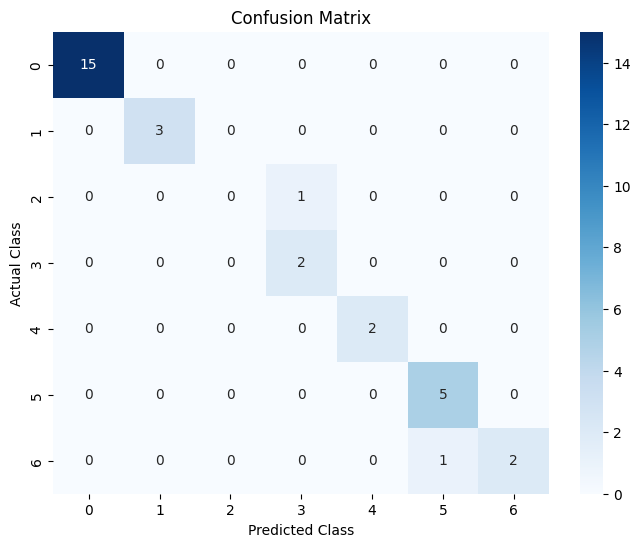

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()